In [21]:
!pip install pyspark

In [22]:
import pyspark as ps
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
spark=SparkSession.builder.appName('TTDS_SEMESTER_PROJECT').getOrCreate()

In [25]:
df_pyspark=spark.read.option('header','true').csv('/content/drive/MyDrive/TTDS_SEMESTER_PROJECT/growth_dataset.csv')

In [26]:
df_pyspark.show()

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|          CD|        Chad|1993|            47.8|           18.71|       -23.09|                2.909|        0.6|
|          CD|        Chad|1994|           47.71|           18.31|         -0.2|                 2.94|       2.92|
|          CD|        Chad|1995|           48.02|            17.9|        21.95|                3.012|      5.207|
|          CD|        Chad|1996|           48.35|           17.51|        -0.14|                3.084|       3.07|
|          CD|        Chad|1997|           48.74|           17.25|         0.18|                3.149|      3.168|
|          CD|        Chad|1998|           49.24|           17.01|        -0.01|

## **EDA**

## **Checking Column Data Types**

In [ ]:
df_pyspark.dtypes

[('country_code', 'string'),
 ('country_name', 'string'),
 ('year', 'string'),
 ('crude_birth_rate', 'string'),
 ('crude_death_rate', 'string'),
 ('net_migration', 'string'),
 ('rate_natural_increase', 'string'),
 ('growth_rate', 'string')]

##  **Displaying the Schema**

In [ ]:
df_pyspark.printSchema()

root
 |-- country_code: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- year: string (nullable = true)
 |-- crude_birth_rate: string (nullable = true)
 |-- crude_death_rate: string (nullable = true)
 |-- net_migration: string (nullable = true)
 |-- rate_natural_increase: string (nullable = true)
 |-- growth_rate: string (nullable = true)



##  **Displaying the First Few Records**

In [ ]:
df_pyspark.show(10)

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|          CD|        Chad|1993|            47.8|           18.71|       -23.09|                2.909|        0.6|
|          CD|        Chad|1994|           47.71|           18.31|         -0.2|                 2.94|       2.92|
|          CD|        Chad|1995|           48.02|            17.9|        21.95|                3.012|      5.207|
|          CD|        Chad|1996|           48.35|           17.51|        -0.14|                3.084|       3.07|
|          CD|        Chad|1997|           48.74|           17.25|         0.18|                3.149|      3.168|
|          CD|        Chad|1998|           49.24|           17.01|        -0.01|

##  **Counting Missing or Null Values**

In [ ]:
from pyspark.sql.functions import col, sum

df_pyspark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_pyspark.columns]).show()

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|           0|           0|   0|               0|               0|            0|                    0|          0|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+



##  **Summary Statistics for Numerical Columns**

In [ ]:
df_pyspark.describe().show()

+-------+------------+------------+------------------+------------------+-----------------+--------------------+---------------------+------------------+
|summary|country_code|country_name|              year|  crude_birth_rate| crude_death_rate|       net_migration|rate_natural_increase|       growth_rate|
+-------+------------+------------+------------------+------------------+-----------------+--------------------+---------------------+------------------+
|  count|       15019|       15019|             15019|             15019|            15019|               15019|                15019|             15019|
|   mean|        NULL|        NULL|2016.9539250282976|20.603596111592047|8.960886210799597|-0.22923297156934583|   1.1642572741194472|1.1029308209601165|
| stddev|        NULL|        NULL|20.096776306325037|11.704585210377935| 4.18805209978343|  29.944937914604814|    1.128616336725442| 3.188699480564978|
|    min|          AA| Afghanistan|              1950|              10.0|   

##  **Checking the Number of Records and Columns**

In [ ]:
df_pyspark.count(), len(df_pyspark.columns)

(15019, 8)

##  **Finding the Number of Unique Countries**

In [ ]:
df_pyspark.select("country_name").distinct().count()

228

##  **Checking Distribution of Growth Rate**

In [ ]:
df_pyspark.select("growth_rate").describe().show()

+-------+------------------+
|summary|       growth_rate|
+-------+------------------+
|  count|             15019|
|   mean|1.1029308209601165|
| stddev| 3.188699480564978|
|    min|            -0.001|
|    max|              9.87|
+-------+------------------+



## ***Data Wrangling/Cleaning***

##  **Removing Duplicate Records**

In [ ]:
df = df_pyspark.dropDuplicates()
df.show()

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|          MU|        Oman|2044|           15.22|            4.08|        -0.75|                1.114|      1.039|
|          TO|        Togo|1999|           37.82|            9.45|         0.02|                2.837|      2.839|
|          CI|       Chile|1995|           19.75|            5.66|         0.85|                1.409|      1.494|
|          KE|       Kenya|2045|           16.13|            6.08|        -0.15|                1.005|      0.991|
|          LY|       Libya|1985|           36.85|            7.31|       -40.63|                2.954|     -1.109|
|          MT|       Malta|2005|            9.49|             7.7|          3.9|

##  **Removing Missing Values**

In [ ]:
df_pyspark = df_pyspark.na.drop()
df_pyspark.show()

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|          CD|        Chad|1993|            47.8|           18.71|       -23.09|                2.909|        0.6|
|          CD|        Chad|1994|           47.71|           18.31|         -0.2|                 2.94|       2.92|
|          CD|        Chad|1995|           48.02|            17.9|        21.95|                3.012|      5.207|
|          CD|        Chad|1996|           48.35|           17.51|        -0.14|                3.084|       3.07|
|          CD|        Chad|1997|           48.74|           17.25|         0.18|                3.149|      3.168|
|          CD|        Chad|1998|           49.24|           17.01|        -0.01|

## **Removing Null Values**

---



In [ ]:
df_pyspark = df_pyspark.dropna()
df_pyspark.show()

+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+------------+----+----------------+----------------+-------------+---------------------+-----------+
|          MU|        Oman|2044|           15.22|            4.08|        -0.75|                1.114|      1.039|
|          TO|        Togo|1999|           37.82|            9.45|         0.02|                2.837|      2.839|
|          CI|       Chile|1995|           19.75|            5.66|         0.85|                1.409|      1.494|
|          KE|       Kenya|2045|           16.13|            6.08|        -0.15|                1.005|      0.991|
|          LY|       Libya|1985|           36.85|            7.31|       -40.63|                2.954|     -1.109|
|          MT|       Malta|2005|            9.49|             7.7|          3.9|

## **Converting Data Types**

In [ ]:
df_pyspark = df_pyspark.withColumn("year", col("year").cast("int")) \
                       .withColumn("crude_birth_rate", col("crude_birth_rate").cast("float")) \
                       .withColumn("crude_death_rate", col("crude_death_rate").cast("float"))
df_pyspark

DataFrame[country_code: string, country_name: string, year: int, crude_birth_rate: float, crude_death_rate: float, net_migration: float, rate_natural_increase: float, growth_rate: float]

In [ ]:
from pyspark.sql.functions import col

# Convert columns to float
df_pyspark = df_pyspark.withColumn("net_migration", col("net_migration").cast("float")) \
                       .withColumn("rate_natural_increase", col("rate_natural_increase").cast("float")) \
                       .withColumn("growth_rate", col("growth_rate").cast("float"))

## **Handling Negative or Invalid Values**

In [ ]:
df_pyspark = df_pyspark.filter(
    (col("growth_rate") >= 0) &
    (col("net_migration") >= 0) &
    (col("rate_natural_increase") >= 0)
)

In [ ]:
df_pyspark.show()

+------------+-----------------+----+----------------+----------------+-------------+---------------------+-----------+
|country_code|     country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|
+------------+-----------------+----+----------------+----------------+-------------+---------------------+-----------+
|          TO|             Togo|1999|           37.82|            9.45|         0.02|                2.837|      2.839|
|          CI|            Chile|1995|           19.75|            5.66|         0.85|                1.409|      1.494|
|          MT|            Malta|2005|            9.49|             7.7|          3.9|                0.179|      0.568|
|          SP|            Spain|2005|           10.67|            8.86|        14.55|                0.181|      1.636|
|          IS|           Israel|2039|           16.04|            6.36|         1.62|                0.968|       1.13|
|          JO|           Jordan|2017|   

## **Creating Derived Columns**

In [ ]:
df_pyspark = df_pyspark.withColumn("natural_growth_gap",
                                   col("crude_birth_rate") - col("crude_death_rate"))
df_pyspark.show()

+------------+-----------------+----+----------------+----------------+-------------+---------------------+-----------+------------------+
|country_code|     country_name|year|crude_birth_rate|crude_death_rate|net_migration|rate_natural_increase|growth_rate|natural_growth_gap|
+------------+-----------------+----+----------------+----------------+-------------+---------------------+-----------+------------------+
|          TO|             Togo|1999|           37.82|            9.45|         0.02|                2.837|      2.839|         28.369999|
|          CI|            Chile|1995|           19.75|            5.66|         0.85|                1.409|      1.494|             14.09|
|          MT|            Malta|2005|            9.49|             7.7|          3.9|                0.179|      0.568|              1.79|
|          SP|            Spain|2005|           10.67|            8.86|        14.55|                0.181|      1.636|         1.8100004|
|          IS|           Is

## **Build Multiple Chart and Explain Observation**

## **Growth Rate WRT Country Name**

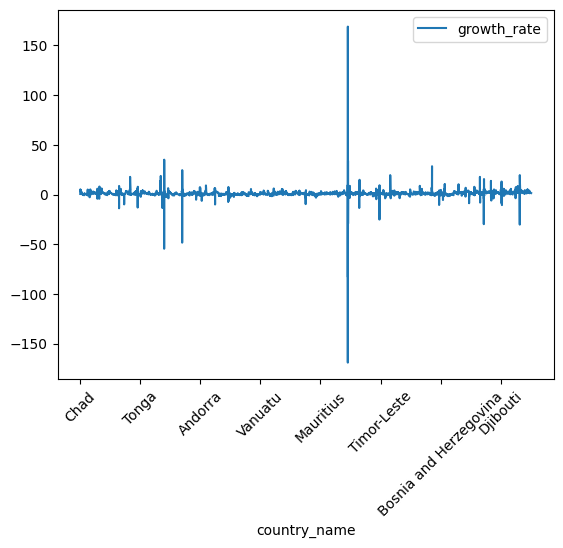

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("country_name", "growth_rate").toPandas()

pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])
# create the bar chart
pdf.plot(x="country_name", y="growth_rate", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Growth Rate Wrt Year**

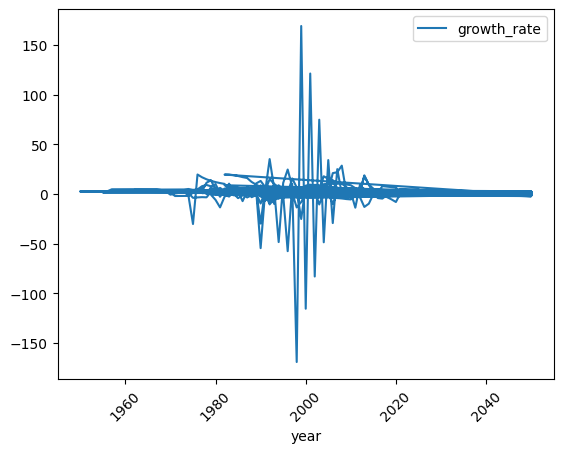

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("year", "growth_rate").toPandas()

pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])
pdf['year'] =pd.to_numeric(pdf['year'])
# create the bar chart
pdf.plot(x="year", y="growth_rate", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Birth Rate and Death Rate wrt Country Name**

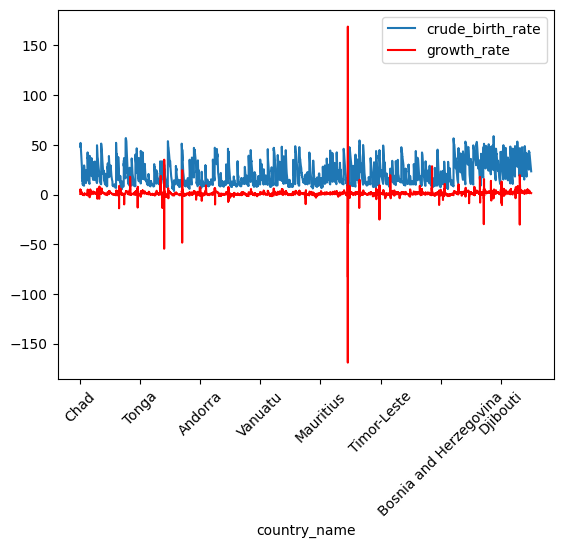

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("crude_birth_rate","country_name","growth_rate").toPandas()

pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])
# create the bar chart
ax=pdf.plot(x="country_name", y="crude_birth_rate", rot=45)
pdf.plot(x="country_name", y="growth_rate", ax=ax, color="red", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Net Migration and Birth rate wrt year**

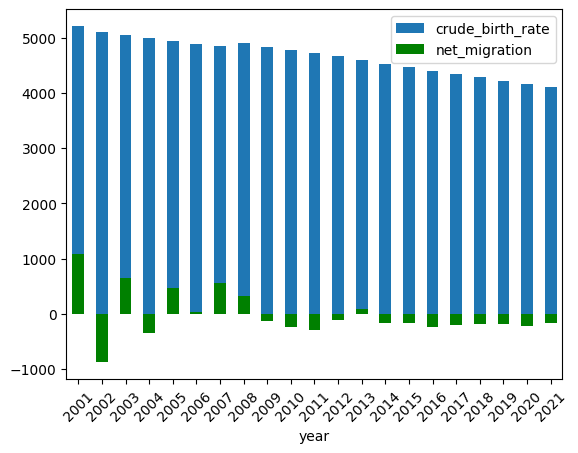

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df.select("crude_birth_rate","year","net_migration").toPandas()
pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['net_migration'] =pd.to_numeric(pdf['net_migration'])
pdf['year'] =pd.to_numeric(pdf['year'])
pdf = pdf[(pdf['year']>2000) & (pdf['year']<2022)]
pdf['year'].unique()
df1 = pdf.groupby('year').sum()
df1 = df1.reset_index()
df1
# create the bar chart
ax = df1.plot(x='year', y="crude_birth_rate",kind='bar', rot=45)
df1.plot(x="year", y="net_migration", ax=ax,kind='bar', color="green", rot=45)
# # # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Net Migration and Birth Rate wrt Country**

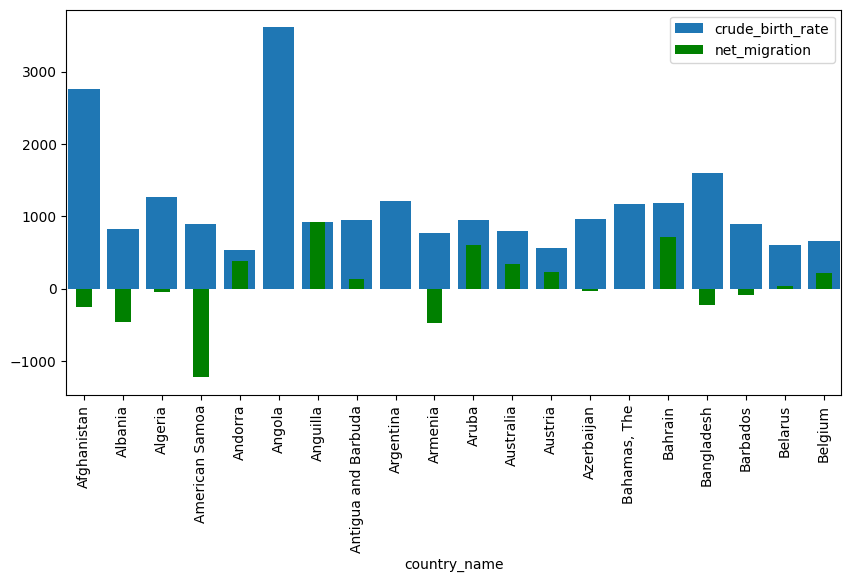

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("crude_birth_rate","country_name","net_migration").toPandas()
pdf['crude_birth_rate'] = pd.to_numeric(pdf['crude_birth_rate'])
pdf['net_migration'] = pd.to_numeric(pdf['net_migration'])

df2 = pdf.groupby('country_name').sum()
df2 = df2.reset_index()
df2 = df2.head(20)

# create the bar chart
ax = df2.plot(x="country_name", y="crude_birth_rate", kind='bar', rot=90, figsize=(10,5), width=0.8)
df2.plot(x="country_name", y="net_migration", ax=ax, kind='bar', color="green", width=0.4)

# display the chart
plt.show()


## **Growth rate and Death rate wrt Country**

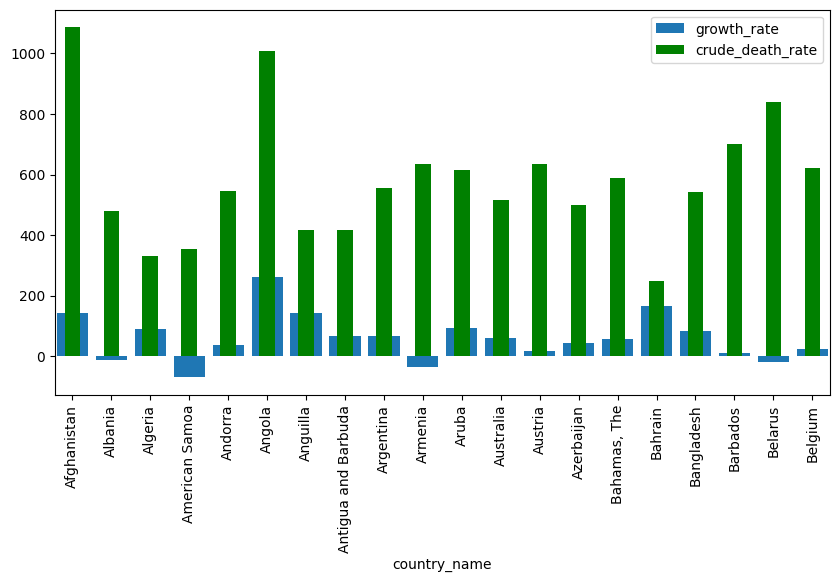

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("growth_rate","country_name","crude_death_rate").toPandas()
pdf['growth_rate'] = pd.to_numeric(pdf['growth_rate'])
pdf['crude_death_rate'] = pd.to_numeric(pdf['crude_death_rate'])

df2 = pdf.groupby('country_name').sum()
df2 = df2.reset_index()
df2 = df2.head(20)

# create the bar chart
ax = df2.plot(x="country_name", y="growth_rate", kind='bar', rot=90, figsize=(10,5), width=0.8)
df2.plot(x="country_name", y="crude_death_rate", ax=ax, kind='bar', color="green", width=0.4)

# display the chart
plt.show()


## **Birth rate and Rate of natural increase**

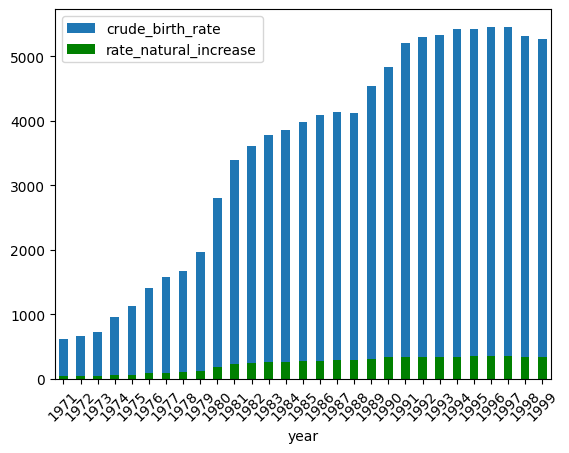

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df.select("crude_birth_rate","year","rate_natural_increase").toPandas()
pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['rate_natural_increase'] =pd.to_numeric(pdf['rate_natural_increase'])
pdf['year'] =pd.to_numeric(pdf['year'])
pdf = pdf[(pdf['year']>1970) & (pdf['year']<2000)]
pdf['year'].unique()
df1 = pdf.groupby('year').sum()
df1 = df1.reset_index()
df1
# create the bar chart
ax = df1.plot(x='year', y="crude_birth_rate",kind='bar', rot=45)
df1.plot(x="year", y="rate_natural_increase", ax=ax,kind='bar', color="green", rot=45)
# # # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Net Migration wrt Country**

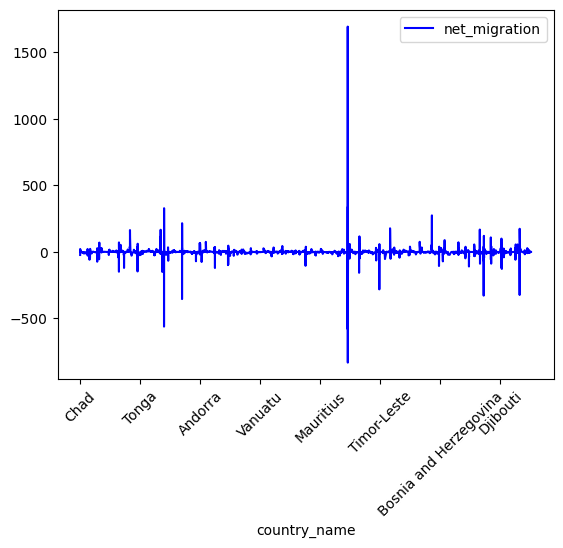

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("country_name","net_migration").toPandas()

pdf['net_migration'] =pd.to_numeric(pdf['net_migration'])
# create the bar chart
pdf.plot(x="country_name", y="net_migration", color="blue", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Birth rate and Growth Rate wrt country**

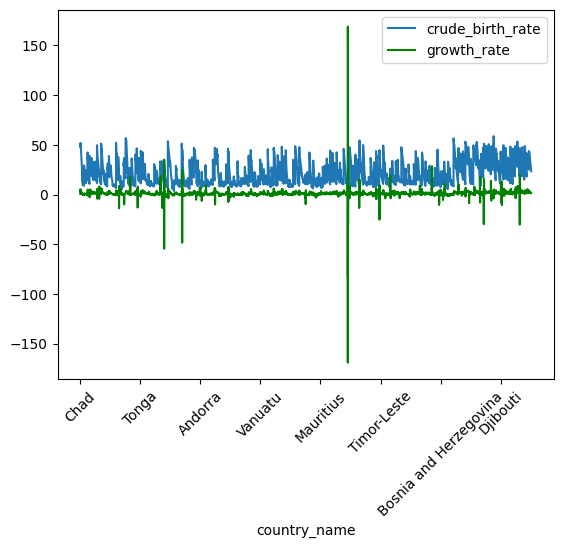

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("crude_birth_rate","country_name","growth_rate").toPandas()

pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])
# create the bar chart
ax=pdf.plot(x="country_name", y="crude_birth_rate", rot=45)
pdf.plot(x="country_name", y="growth_rate", ax=ax, color="green", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart






## **Net Migration and Growth wrt Country**

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df_pyspark.select("growth_rate","country_name","net_migration").toPandas()

pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])
pdf['net_migration'] =pd.to_numeric(pdf['net_migration'])
# create the bar chart
ax=pdf.plot(x="country_name", y="net_migration", rot=45)
pdf.plot(x="country_name", y="net_migration", ax=ax, color="green", rot=45)
# # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart






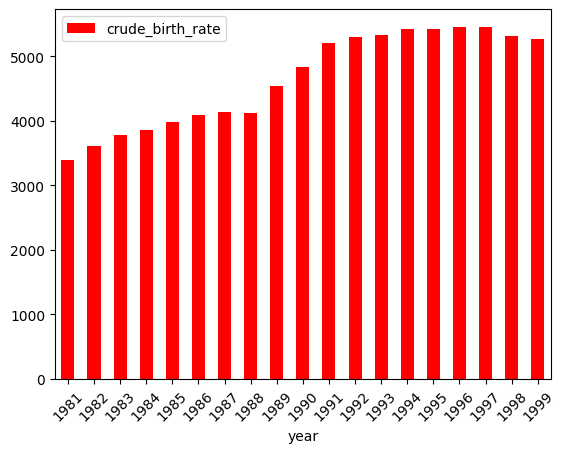

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df.select("crude_birth_rate","year").toPandas()
pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['year'] =pd.to_numeric(pdf['year'])
pdf = pdf[(pdf['year']>1980) & (pdf['year']<2000)]
pdf['year'].unique()
df1 = pdf.groupby('year').sum()
df1 = df1.reset_index()
df1
# create the bar chart
df1.plot(x='year', y="crude_birth_rate",kind='bar',color='red' ,rot=45)
# # # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





## **Death Rate wrt Year**

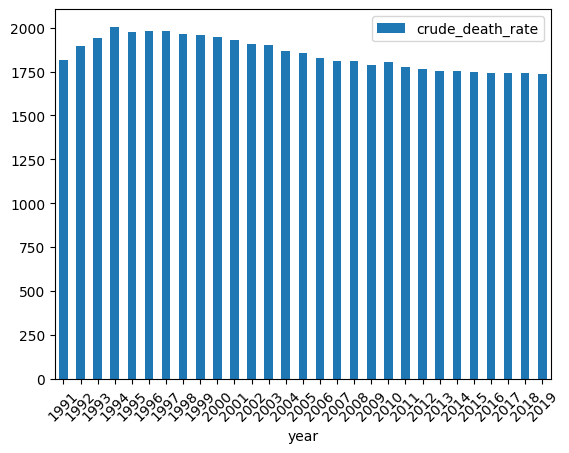

In [ ]:
# convert the DataFrame to a pandas DataFrame
pdf = df.select("crude_death_rate","year").toPandas()
pdf['crude_death_rate'] =pd.to_numeric(pdf['crude_death_rate'])
pdf['year'] =pd.to_numeric(pdf['year'])
pdf = pdf[(pdf['year']>1990) & (pdf['year']<2020)]
pdf['year'].unique()
df1 = pdf.groupby('year').sum()
df1 = df1.reset_index()
df1
# create the bar chart
df1.plot(x='year', y="crude_death_rate",kind='bar', rot=45)
# # # display the chart
plt.show()
# Output:

# Bar chart of country_name and growth_rate

# In the above example, we created a sample DataFrame with growth rates for Chad and the United States, and then converted it to a pandas DataFrame using the toPandas() method. We then used the plot.bar() method to create the bar chart





In [ ]:
df.columns

['country_code',
 'country_name',
 'year',
 'crude_birth_rate',
 'crude_death_rate',
 'net_migration',
 'rate_natural_increase',
 'growth_rate']

## **Box Plot to see different Data Distrubution**

/tmp/ipython-input-3712410662.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'year'),
 Text(1, 0, 'crude_birth_rate'),
 Text(2, 0, 'crude_death_rate'),
 Text(3, 0, 'net_migration'),
 Text(4, 0, 'rate_natural_increase'),
 Text(5, 0, 'growth_rate')]

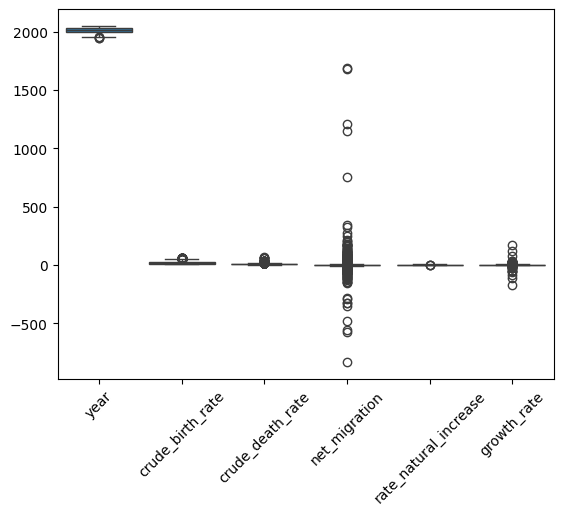

In [27]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import seaborn as sns

pdf = df_pyspark.select('country_code',
 'country_name',
 'year',
 'crude_birth_rate',
 'crude_death_rate',
 'net_migration',
 'rate_natural_increase',
 'growth_rate').toPandas()

pdf['crude_birth_rate'] =pd.to_numeric(pdf['crude_birth_rate'])
pdf['crude_death_rate'] =pd.to_numeric(pdf['crude_death_rate'])
pdf['year'] =pd.to_numeric(pdf['year'])
pdf['net_migration'] =pd.to_numeric(pdf['net_migration'])
pdf['rate_natural_increase'] =pd.to_numeric(pdf['rate_natural_increase'])
pdf['growth_rate'] =pd.to_numeric(pdf['growth_rate'])


# select the numeric columns
numeric_cols = ['year', 'crude_birth_rate', 'crude_death_rate', 'net_migration', 'rate_natural_increase', 'growth_rate']
numeric_data = pdf[numeric_cols]

# plot box plot with adjusted layout
# create the box plot
ax = sns.boxplot(data=numeric_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## **Using ML Technique for Prediction**

## **Linear Regression for for Forecasting Growth Rate**

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# select the features and target variable
X = numeric_data[['year', 'crude_birth_rate', 'crude_death_rate', 'net_migration', 'rate_natural_increase']]  # independent variable
y = numeric_data['growth_rate']  # dependent variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create the linear regression model and fit the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model
print("----- Linear Regression Results -----")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# make a forecast for a new year
new_year = np.array([[2027,	28.87,	9.54,	-4.06,	1.933]])
forecast = model.predict(new_year)
print('Forecast : %.2f' % forecast)


----- Linear Regression Results -----
Mean squared error: 1.97
R2 score: 0.61
Forecast : 1.72


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-939713869.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Forecast : %.2f' % forecast)


In [29]:
X_test

,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase
12703,2007,28.87,9.54,-4.06,1.933
4745,1998,8.80,10.64,0.92,-0.184
2288,1997,14.14,7.33,9.92,0.681
7882,2041,8.14,17.56,-5.24,-0.942
8466,1984,29.94,4.55,2.96,2.539
...,...,...,...,...,...
1444,2047,8.65,13.21,3.89,-0.456
7386,2003,18.54,7.57,-0.65,1.097
3499,2029,8.39,13.66,0.00,-0.527
13106,1971,46.64,26.57,-2.21,2.007


## **Co-relation calculation**

In [ ]:
numeric_data.corr()

,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
year,1.000000,-0.559715,-0.200040,-0.009222,-0.506244,-0.176913
crude_birth_rate,-0.559715,1.000000,0.277055,-0.039069,0.934274,0.303738
crude_death_rate,-0.200040,0.277055,1.000000,-0.008778,-0.083753,-0.058668
net_migration,-0.009222,-0.039069,-0.008778,1.000000,-0.037261,0.348259
rate_natural_increase,-0.506244,0.934274,-0.083753,-0.037261,1.000000,0.336771
growth_rate,-0.176913,0.303738,-0.058668,0.348259,0.336771,1.000000


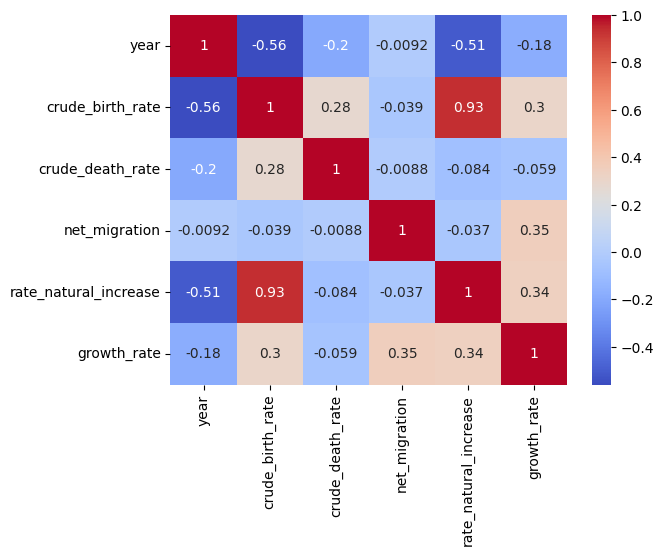

In [ ]:

# plot heatmap
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)

# show plot
plt.show()

## **Random Forest Regressor for forecasting Growth Rate**

In [30]:
# -----------------------------
# Random Forest Regressor
# -----------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate model
print("----- Random Forest Results -----")
print("Mean Squared Error:", round(mean_squared_error(y_test, rf_pred), 2))
print("R2 Score:", round(r2_score(y_test, rf_pred), 2))

# Forecast for new data
new_year = np.array([[2027, 28.87, 9.54, -4.06, 1.933]])
rf_forecast = rf_model.predict(new_year)
print("Random Forest Forecast:", round(rf_forecast[0], 2))


----- Random Forest Results -----
Mean Squared Error: 4.43
R2 Score: 0.12
Random Forest Forecast: 1.54


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## **XGBoost Regressor linear regression for forecasting Growth Rate**


In [31]:
!pip install xgboost

In [32]:
# -----------------------------
# XGBoost Regressor
# -----------------------------

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_pred = xgb_model.predict(X_test)

# Evaluate model
print("----- XGBoost Results -----")
print("Mean Squared Error:", round(mean_squared_error(y_test, xgb_pred), 2))
print("R2 Score:", round(r2_score(y_test, xgb_pred), 2))

# Forecast for new data
xgb_forecast = xgb_model.predict(new_year)
print("XGBoost Forecast:", round(xgb_forecast[0], 2))


----- XGBoost Results -----
Mean Squared Error: 4.87
R2 Score: 0.03
XGBoost Forecast: 1.51


## **LASSO REGRESSION for Forecasting GrowthRate**

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = numeric_data[['year', 'crude_birth_rate', 'crude_death_rate', 'net_migration', 'rate_natural_increase']]
y = numeric_data['growth_rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)   # alpha controls regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_pred = lasso_model.predict(X_test)

# Evaluation
print("----- LASSO REGRESSION RESULTS -----")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Forecast for new year
new_year = np.array([[2027, 28.87, 9.54, -4.06, 1.933]])
lasso_forecast = lasso_model.predict(new_year)
print(f"Lasso Forecast: {lasso_forecast[0]:.2f}")

----- LASSO REGRESSION RESULTS -----
Mean Squared Error: 1.98
R2 Score: 0.61
Lasso Forecast: 1.71


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


## **SUPPORT VECTOR REGRESSION (SVR) for Forecasting Growth Rate**

In [34]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = numeric_data[['year', 'crude_birth_rate', 'crude_death_rate', 'net_migration', 'rate_natural_increase']]
y = numeric_data['growth_rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model (RBF kernel performs best in most datasets)
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svr_model.predict(X_test_scaled)

# Evaluation
print("----- SUPPORT VECTOR REGRESSION (SVR) RESULTS -----")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Forecast (scale input first)
new_year = np.array([[2027, 28.87, 9.54, -4.06, 1.933]])
new_year_scaled = scaler.transform(new_year)

svr_forecast = svr_model.predict(new_year_scaled)
print(f"SVR Forecast: {svr_forecast[0]:.2f}")

----- SUPPORT VECTOR REGRESSION (SVR) RESULTS -----
Mean Squared Error: 2.22
R2 Score: 0.56
SVR Forecast: 1.55


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
